<a href="https://colab.research.google.com/github/JMCastle98/M4_Analisis_de_Datos_con_Python/blob/main/Postwork05/Postwork05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Postwork 5 - Bootstrap, Error Estándar e Intervalos de Confianza

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df_clean = pd.read_csv("https://raw.githubusercontent.com/JMCastle98/M4_Analisis_de_Datos_con_Python/main/Dataset/pok%C3%A9dex_clean.csv", index_col=0)
df_numerico = df_clean[["height_m","weight_kg","total_points","hp","attack","defense","sp_attack","sp_defense","speed"]]

##  Bootstrap

El Bootstrap nos sirve para generar lo que se llaman distribuciones muestrales de estadísticas. Esto es un histograma de una medida estadística cuantificada utilizando un gran número de remuestreos. Nos sirve para calcular la incertidumbre de nuestra medida estadística.

El algoritmo es el siguiente:

1.   Tomar un elemento de tu conjunto de datos de manera aleatoria con reposición.
2.   Repetir el paso 1 n veces (entre más grande tu n, más preciso tu cálculo; pero no tiene sentido que sea tan grande como el tamaño de tu muestra).
3. Tomar la medida estadística que te interese de tus valores remuestreados.
4. Repietir los pasos 1 a 3 R veces (entre mayor sea R, más preciso tu cálculo).
5. Utilizar las medidas obtenidas para: a) Generar un histograma o boxplot b) Calcular el error estándar c) Calcular un intervalo de confianza



En esta ocasión nos concentraremos en 4 variables para realizar el bootstrap, estás son:

    height_m
    weight_kg
    total_points
    speed


Estás 4 variables son tomadas ya que, el tamaño y el peso son algo característico de todos los pokemon, los puntos totales es una variable que depende de la mayorias de las habilidades de cada pokémon y la velocidad es la variable con menos correlación con los puntos totales de los pokemon. Para facilitar el proceso antes descrito realizamos una función:

In [ ]:
def bootstrap(campo, color):
  means = []
  for i in range(1000):
    sample = df_numerico[campo].sample(n=50, replace = True)
    means.append(sample.mean())
    serie_means = pd.Series(means)

  limite_inferior = serie_means.quantile(0.025)
  limite_superior = serie_means.quantile(0.975)
  
  print("La asimetría es :" ,serie_means.skew())
  print("La kurtosis es :" ,serie_means.kurtosis())

  plt.figure(figsize=(5,10))
  sns.displot(serie_means, color=color )
  plt.show()  
  # a) Error estándar
  print(f'Error estandar: {serie_means.std()}')
  print(f'Valor mínimo: {serie_means.min()}')
  print(f'Valor máximo: {serie_means.max()}')
  print(f'Rango: {serie_means.max() - serie_means.min()}')
  
  sns.boxplot(x = serie_means, color =color);
  plt.show()
  # b) Intervalos de confianza

  print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {df_numerico[campo].mean()} < {limite_superior}')
  mean_of_intervals = ((df_numerico[campo].mean() - limite_inferior) + (limite_superior - df_numerico[campo].mean())) / 2

  print(f'Intervalo de 95% confianza de la media: {  df_numerico[campo].mean()} +/- {mean_of_intervals  } ')

  sns.displot(serie_means, color= color )
  plt.axvline(limite_inferior, c = 'k')
  plt.axvline(limite_superior, c ='k')
  plt.show()



Probemósla con la altura de los pokémon:

La asimetría es : 3.7301810060417075
La kurtosis es : 16.673530687013727


<Figure size 360x720 with 0 Axes>

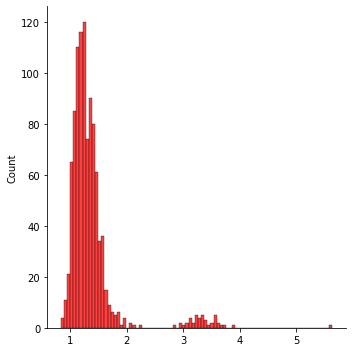

Error estandar: 0.4758256763040748
Valor mínimo: 0.8359999999999999
Valor máximo: 5.629999999999999
Rango: 4.793999999999999


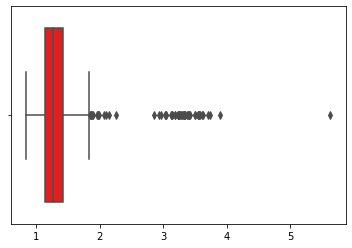

Intervalo de 95% confianza de la media: 0.9819499999999997 < 1.374066985645932 < 3.2624
Intervalo de 95% confianza de la media: 1.374066985645932 +/- 1.140225 


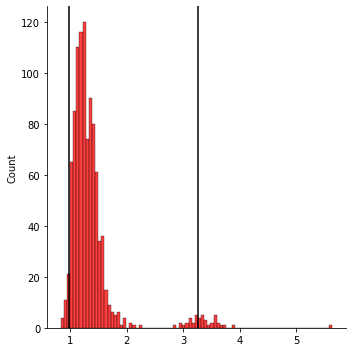

In [ ]:
bootstrap("height_m","red")

¿Qué podemos concluir? Qué al contar con el universo de datos sobre pokémon, aún con la existencia de outliers como Eternatus, al realizar el método bootstrap la media de alturas seguirán en torno a 1.37 metros en una distribución con símetria positiva en la media aunque el rango sea algo grande.

La asimetría es : 0.6097037374722404
La kurtosis es : 0.5220314645961923


<Figure size 360x720 with 0 Axes>

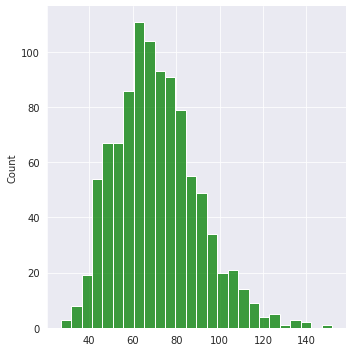

Error estandar: 18.97796683475564
Valor mínimo: 26.848000000000003
Valor máximo: 151.75199999999998
Rango: 124.90399999999998


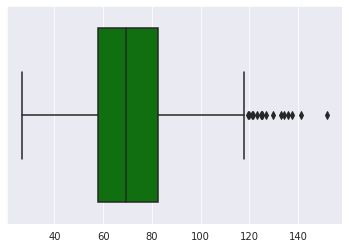

Intervalo de 95% confianza de la media: 40.82575 < 71.21657088122608 < 113.00299999999997
Intervalo de 95% confianza de la media: 71.21657088122608 +/- 36.088624999999986 


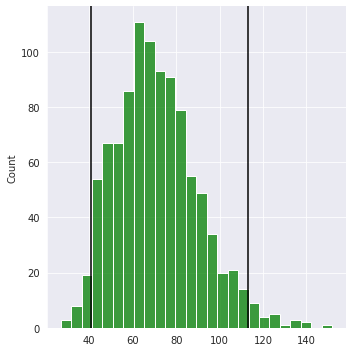

In [ ]:
bootstrap("weight_kg","green")

En el caso de peso la distribución de medias se comporta más uniformemente, contamos un valor de curtosis y asímetria medios que ayudan a describir su comportamiento. El intervalo de confianza engloba a prácticamente todos los pokémon de todos los tipos.

La asimetría es : 0.21519412487619793
La kurtosis es : 0.08177041348788361


<Figure size 360x720 with 0 Axes>

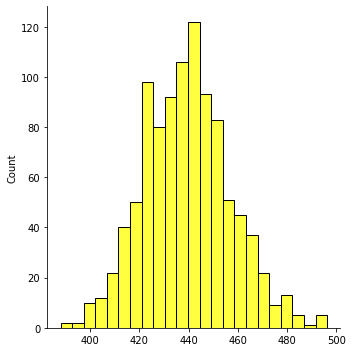

Error estandar: 17.50540442847877
Valor mínimo: 387.96
Valor máximo: 496.24
Rango: 108.28000000000003


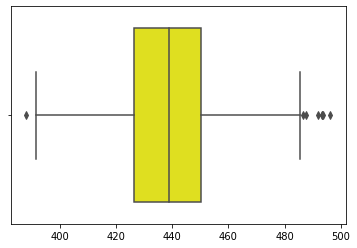

Intervalo de 95% confianza de la media: 406.371 < 439.3531100478469 < 476.37649999999996
Intervalo de 95% confianza de la media: 439.3531100478469 +/- 35.00274999999999 


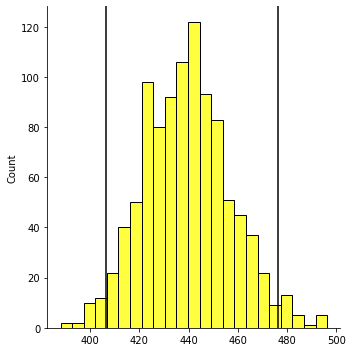

In [ ]:
bootstrap("total_points", "yellow")

La distribución de medias de los puntos totales también tiene un comportamiento muy bueno, un pokémon promedio en la mayoría de los casos contará con al menos 440 puntos totales con un rango de seguridad de 35 puntos.

La asimetría es : 0.10802643830441777
La kurtosis es : 0.001514881769802301


<Figure size 360x720 with 0 Axes>

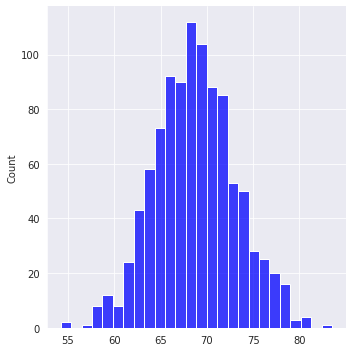

Error estandar: 4.378024536162312
Valor mínimo: 54.2
Valor máximo: 83.52
Rango: 29.319999999999993


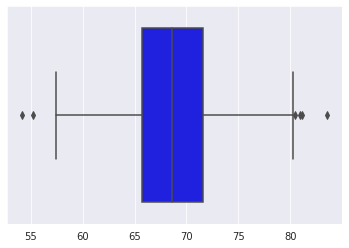

Intervalo de 95% confianza de la media: 59.9595 < 68.74904214559388 < 77.6415
Intervalo de 95% confianza de la media: 68.74904214559388 +/- 8.840999999999998 


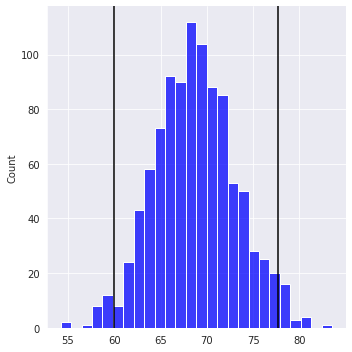

In [ ]:
bootstrap("speed","blue")

Con el método boostrap sabemos que los pokémon tienden a tener 68.74 puntos de velocidad, para atacar primero debes superar el límite superior del intervalo de confianza, es decir, 77.64 puntos de velocidad.